## Imports & Data loading 

[Link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=0) to dictionary of the airbnb dataset

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

params = {
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.titlesize" : 14,
    "figure.figsize" : (16, 5)

}
plt.rcParams.update(params) 

In [2]:
# Helper functions
def plot_bar_perc(series, title=None, rotate=False, datalabel=False, **bar_kwargs):
    splot = sns.barplot(x=series.index, y=series.values, **bar_kwargs)
    
    if datalabel:
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
    if rotate:
        plt.xticks(rotation=90)

    splot.set(title=title, ylabel="Percentage", xlabel="Feature")
    sns.despine()
    plt.show()

In [3]:
# Read data
df = pd.read_csv("data\listings_summary.csv")
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [4]:
display(df.shape)
display(df.columns)

(22552, 96)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'mont

## Manual Feature Selection

I made the assumption that we want to predict a completely new listing from a new host, no historical information regarding the host or listing can be used. 
We also remove the monthly and weekly prices as these are obviously not available during prediction.

In [5]:
not_available_cols = ["host_response_rate", "host_listings_count", "host_response_time", "host_acceptance_rate",
                      "host_is_superhost", "host_total_listings_count", "number_of_reviews", "first_review", "last_review", 
                      "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",
                       "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month",
                       "calculated_host_listings_count", "weekly_price", "monthly_price", "calendar_updated", "has_availability", 
                       "extra_people",  "security_deposit", "cleaning_fee", 'availability_30', 'availability_60', 'availability_90', 
                       'availability_365',"scrape_id", "last_scraped"]
                       
df.drop(not_available_cols, axis=1, inplace=True)

Alot of columns still remain, we start by using our common knowledge and remove columns that are very likely to not contain any predictive power.

In [6]:
useless_cols =  ["id", "listing_url", "thumbnail_url", "medium_url", "picture_url", 
                "xl_picture_url", "host_id", "host_url", "host_name", "host_since", "host_location","host_about", "host_thumbnail_url", 
                "host_picture_url", "host_has_profile_pic", "calendar_last_scraped", "host_neighbourhood", "host_verifications", "is_location_exact"]    
df.drop(useless_cols, axis=1, inplace=True)

Some columns could contain usefull information, but require us to use fancy NLP, which is not an option in the given timeframe. Hence, we also drop these columns.

In [7]:
nlp_cols = ["summary","space", "description", "name", "neighborhood_overview", "notes", "transit", "access", "interaction", "house_rules"]
df.drop(nlp_cols, axis=1, inplace=True)

We have alot of geographical columns. We can see that all data is from one city (Berlin - germany) so everything city/country related has no predictive power

In [8]:
geographical_cols = ["city", "state", "market", "smart_location", "country_code", "country", "street", "neighbourhood",
                     "neighbourhood_cleansed", "neighbourhood_group_cleansed", "zipcode", "latitude", "longitude"]

for col in geographical_cols:
    print(f"{col:<30}:{df[col].nunique()}")
df[geographical_cols].tail(5)

city                          :60
state                         :19
market                        :6
smart_location                :61
country_code                  :1
country                       :1
street                        :86
neighbourhood                 :91
neighbourhood_cleansed        :136
neighbourhood_group_cleansed  :12
zipcode                       :215
latitude                      :22552
longitude                     :22552


,city,state,market,smart_location,country_code,country,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude
22547,Berlin,Berlin,Berlin,"Berlin, Germany",DE,Germany,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,10119,52.533865,13.400731
22548,Berlin,Berlin,Berlin,"Berlin, Germany",DE,Germany,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,10777,52.496211,13.341738
22549,Berlin,Berlin,Berlin,"Berlin, Germany",DE,Germany,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,10119,52.531800,13.411999
22550,Berlin,Berlin,Berlin,"Berlin, Germany",DE,Germany,"Berlin, Berlin, Germany",Mitte,Alexanderplatz,Mitte,10117,52.520802,13.378688
22551,Berlin,Berlin,Berlin,"Berlin, Germany",DE,Germany,"Berlin, Berlin, Germany",Neukölln,Schillerpromenade,Neukölln,12049,52.473762,13.424447


After inspecting every column, `neighbourhood_group_cleansed` and `neighbourhood_cleansed` seem to be the cleanest text-based geographical features.
We drop most of the other geographical related columns, except for the numerical `latitude` and `longitude` as our randomforestregressor should be able to extract the complex non-linear relation between price and these two coordinate values

In [9]:
dropped_geo_cols = ["city", "state", "market", "smart_location", "country_code", "country", "street", "neighbourhood", "zipcode"]
df.drop(dropped_geo_cols, axis=1, inplace=True)

In [10]:
display(df.shape)
display(df.columns)

(22552, 27)

Index(['experiences_offered', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification'], dtype='object')

## Data cleaning

#### Missing Values

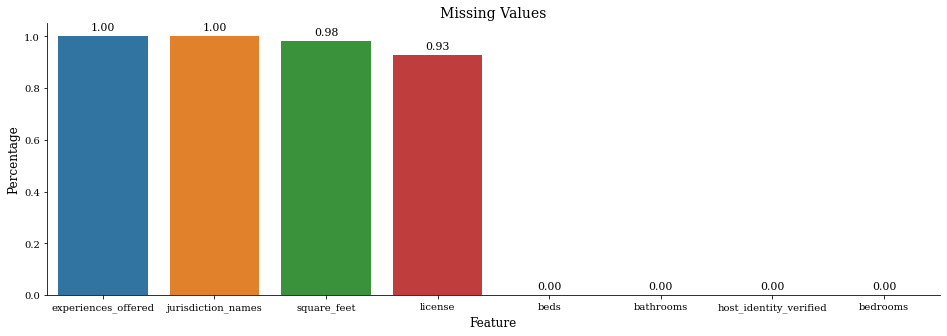

In [11]:
# This columns contained alot of "none" strings, we replace it with NaN before analyzing missing values
df["experiences_offered"] = df["experiences_offered"].replace("none", np.nan)

nan_df = df.isna().mean(axis=0).sort_values(ascending=False)
nan_df = nan_df[nan_df>0]

plot_bar_perc(nan_df, title="Missing Values", datalabel=True)

We drop all columns with >90% missing. 

In [12]:
# Drop cols with more than 30% missing values
drop_cols = list(nan_df[nan_df>0.9].index)

df.drop(drop_cols, axis=1, inplace=True)
print(f"Dropped {drop_cols}")

Dropped ['experiences_offered', 'jurisdiction_names', 'square_feet', 'license']


In [13]:
# Impute remaining columns
from sklearn.impute import SimpleImputer

impute_cols = ["bedrooms", "bathrooms", "beds"]
imputer = SimpleImputer(strategy="median") 
df[impute_cols] = imputer.fit_transform(df[impute_cols])

impute_cols = ["host_identity_verified"]
imputer = SimpleImputer(strategy="most_frequent") 
df[impute_cols] = imputer.fit_transform(df[impute_cols])

### Checking/Cleaning Individual Columns

#### price

In [14]:
# Format string prices into float
df["price"] = df["price"].replace({"\$": "", ",":""}, regex=True).astype(float)

df["price"].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [15]:
print(f"Dropped {len(df[df['price'] == 0])} rows with price = 0")

# # Drop 0 price listings
df.drop(df[df["price"] <= 1].index, inplace=True)

Dropped 8 rows with price = 0


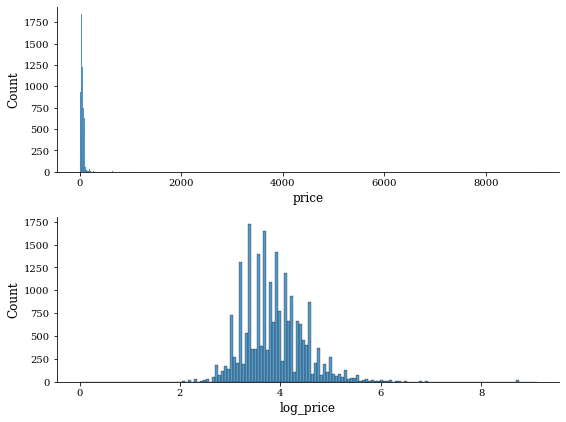

In [16]:
# Log transformation will reduce skewness and help algorithms to learn dependencies better.
df["log_price"] = np.log(df["price"])

fig, axs = plt.subplots(2,1, figsize=(8,6))
sns.histplot(x="price", data=df, kde=False, ax=axs[0])
sns.histplot(x="log_price",data=df, kde=False, ax=axs[1])
sns.despine()
plt.tight_layout()
plt.show()

In [17]:
# Check how many (extremely) high prices are in the dataset
outlier_df = df[df['price'] > 1000]
outlier_indices = outlier_df.index.values

len(outlier_indices)

37

We can manually check the 37 rows to see if we can discover any bad data entries. We would like to use the original data for this, as we can look into (now dropped) columns such as the description

In [18]:
# We manually check some outliers, but would like
orig_df = pd.read_csv("data\listings_summary.csv")

outlier_df = orig_df.iloc[outlier_indices]
display(outlier_df[["name", "description", "price"]].T)


,766,1990,4117,4573,4744,6655,7725,9528,11051,11070,13920,15665,16915,17250,19372,19373,19407,19409,19410,19411,19412,19413,19414,19415,19655,19656,19657,19658,19659,19660,19661,19662,19663,19700,19729,21389,22372
name,20m2 of relaxation ***,250 qm penthouse with roof terrace for photoshoot,12 m2 of relaxation ***,Gemütliches Zimmer absolut zentral gelegen,Night ***,Über den Dächern Berlins Zentrum,Fusion Factory Event Space,WG-Zimm (Phone number hidden by Airbnb),Cosy Apartment / Modern Design 120 sqm,BERLIN CITY SKYLINE EVENTLOCATION THE WEST VIEW,"Luxury Penthouse with sauna, rooftop and jacuzzi",Spacious stylish flat for your New Year in Berlin,NaN,195 SQM & 5 BR // ENTIRE FLOOR: MAX 21 PERSON,Axel City Room at TWO Hotel Berlin by Axel,Axel City with Breakfast at TWO Hotel Berlin b...,Axel Single Room at TWO Hotel Berlin by Axel,Axel Single Room with Breakfast at TWO Hotel B...,Axel Junior Suite with Breakfast at TWO Hotel ...,Axel Suite at TWO Hotel Berlin by Axel,Axel Junior Suite at TWO Hotel Berlin by Axel,Axel Suite with Breakfast at TWO Hotel Berlin ...,Axel Superior Room at TWO Hotel Berlin by Axel,Axel Superior Room with Breakfast at Axel Hote...,Axel Single Room at Axel Hotel Berlin,Axel Superior Room at Axel Hotel Berlin,Axel Single room with Breakfast at Axel Hotel ...,Axel city with Breakfast at Axel Hotel Berlin,Axel Junior Suite at Axel Hotel Berlin,Axel Suite with Breakfast at Axel Hotel Berlin,Axel Junior Suite with Breakfast at Axel Hotel...,Axel City Room at Axel Hotel Berlin,Axel Suite at Axel Hotel Berlin,Axel Superior Room with Breakfast at Axel Hote...,Space for a great time - enjoy!,Berlin Apartment Friedrichshain,Cool Luxury meets Amazing Design!
description,Dear travellers - I'm renting out a 20 sq mete...,For Photoshoots and events. Exceptional 250sqm...,Dear travellers - I'm renting out a 12 sq mete...,Gemütlich eingerichtete Wohnung ruhig im 2. Hi...,"Dear Travelers , Welcome in my apartment. I re...",Zentrale Lage direkt U-Bahnhof Augsburger Stra...,FUSION FACTORY is a 250m2 Catered Event Space ...,only from 15.08-11.09.2016 !!!! -2min vom S-...,Wir vermieten ein wunderschöne Altbau Wohnung ...,The Apartment Eventlocation has the most beaut...,5 stars plus penthouse combined with great var...,Hey Guys! we rent out our whole flat for your ...,"You can have access to Living room, Kitchen as...",In the heart of Berlin welcomes you this moder...,This hotel offers free WiFi as well as a popul...,This hotel offers free WiFi as well as a popul...,WITH A WONDERFUL PATIO VIEW AND THE NEWEST TEC...,WITH A WONDERFUL PATIO VIEW AND THE NEWEST TEC...,"WITH CITY VIEWS, PRIVATE TERRACE AND A KING SI...",WITH A LIVING ROOM TO DISCONNECT FROM BERLIN’S...,"WITH CITY VIEWS, PRIVATE TERRACE AND A KING SI...",WITH A LIVING ROOM TO DISCONNECT FROM BERLIN’S...,EQUIPPED WITH A KING SIZE BED FOR YOUR MAJOR C...,EQUIPPED WITH A KING SIZE BED FOR YOUR MAJOR C...,Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,"Located in Schöneberg, the heart of the gay sc...",Axel Hotel Berlin is a stylish and open minded...,Axel Hotel Berlin is a stylish and open minded...,NaN,"Classical, bright Whilhelminian Style Appartme...",This super Luxury loft is located directly on ...
price,"$2,228.00","$2,500.00","$2,225.00","$4,240.00","$2,225.00","$9,000.00","$1,900.00","$5,000.00","$1,050.00","$1,250.00","$1,875.00","$8,000.00","$5,000.00","$2,500.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$6,000.00","$3,000.00","$8,600.00","$1,500.00"


In [19]:
# Axel hotels berlin have prices ranging 70-400 ish euros. The $6,000.00 rooms have do be a wrong data entry (the identical prices for their different rooms verifies this)
# https://www.axelhotels.com/be/rv_tarifas.xhtml?lng=en
outlier_df = outlier_df[outlier_df['description'].str.contains("Axel").fillna(False)]
df.drop(outlier_df.index.values, axis=0, inplace=True)

# Save memory by droping original df after its use
del orig_df

#### amenities

In [20]:
# Amenities: a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:

# Example of amenities listed
df["amenities"].values[0]

'{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}'

In [21]:
# Creating a set of all possible amenities
def get_unique_amenities(df):
    amenities_list = list(df["amenities"])

    # Join all lists (i.e rows of large strings) into huge string
    amenities_list_string = " ".join(amenities_list)

    # Clean the string
    char_to_replace = {'{': '', '}': ',',  '"': ''}
    for key, value in char_to_replace.items():
        amenities_list_string = amenities_list_string.replace(key, value)

    # Convert string to list with elements delimited by a comma
    amenities_set = [x.strip() for x in amenities_list_string.split(',')]

    # Drop duplicates by converting the list to a set
    return set(amenities_set)

amenities_set = get_unique_amenities(df)

for am in amenities_set:
    print(am, end='\t\t')

Private living room				Wheelchair accessible		Shampoo		Beach essentials		Microwave		Hot water		Wide clearance to shower		Accessible-height toilet		Paid parking off premises		Wifi		High chair		Crib		Bathtub with bath chair		Body soap		Shower chair		Bedroom comforts		Disabled parking spot		Doorman		Beachfront		Essentials		Well-lit path to entrance		Washer / Dryer		Lake access		toilet		Iron		Gym		Dryer		Bathtub		Smoking allowed		Kitchen		Lock on bedroom door		Hangers		Dishwasher		Ground floor access		Smart lock		Smoke detector		Smart TV		translation missing: en.hosting_amenity_50		Wide hallway clearance		First aid kit		Laptop friendly workspace		Air conditioning		Indoor fireplace		Breakfast table		Free parking on premises		Refrigerator		Breakfast		Family/kid friendly		Other pet(s)		Washer		Suitable for events		Ski-in/Ski-out		Safety card		Room-darkening shades		Handheld shower head		translation missing: en.hosting_amenity_49		Self check-in		Stove		Ceiling hoist		Dog(s)		24-hour check-in		

In [22]:
str_to_replace = {   
    "Heating"                                                                   : "heating",
    "Luggage dropoff allowed"                                                   : "luggage_dropoff",
    "Single level home"                                                         : "single_level_home",
    "Private bathroom"                                                          : "private_bathroom",
    "Convection oven|Oven"                                                      : "oven",
    "Indoor fireplace"                                                          : "indoor_fireplace",
    "Sound system"                                                              : "sound_system",
    "Cleaning before checkout"                                                  : "cleaning_before_checkout",
    "Private living room"                                                       : "private_living_room",
    "Single level home"                                                         : "single_level_home",
    "Full kitchen|Kitchen"                                                      : "kitchen",
    "Bathtub|Bathtub with bath chair"                                           : "bathtub",
    "Free street parking|Free parking on premises"                              : "free_parking",
    '24-hour check-in'                                                          : 'check_in_24h',
    "Air conditioning"                                                          : 'air_conditioning',
    'Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'   : "high_end_electronics",
    'BBQ grill|Fire pit|Propane barbeque'                                       : "bbq",
    'Balcony|Patio|Patio or balcony'                                            : "balcony",
    'Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront' : "nature_and_views",
    "linens"                                                                    : "bed_linen",
    "Breakfast"                                                                 : "breakfast",
    "TV"                                                                        : "tv",
    'Coffee maker|Espresso machine'                                             : "coffee_machine",
    'Cooking basics'                                                            : "cooking_basics",
    'Dishwasher|Dryer|Washer|Washer / Dryer'                                    : "white_goods",
    "Elevator"                                                                  : "elevator",
    'Exercise equipment|Gym|gym'                                                : "gym",
    'Family/kid friendly|Children|children'                                     : "child_friendly",
    "parking"                                                                   : "parking",
    "Garden|Outdoor|Sun loungers|Terrace|Garden or backyard"                    : "outdoor_space",
    "Host greets you"                                                           : "host_greeting",
    'Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'                                : "hot_tub_sauna_or_pool",
    'Internet|Pocket wifi|Wifi'                                                 : "internet",
    'Long term stays allowed'                                                   : "long_term_stays",
    'Pets|pet|Cat(s)|Dog(s)|Pets allowed|Pets live on this property|Other pet(s)' : "pets_allowed",
    'Private entrance'                                                          : "private_entrance",
    "Safe|Security system"                                                      : "secure",
    'Self check-in'                                                             : "self_check_in",
    "Wheelchair accessible|Step-free access|Wheelchair|Accessible|Roll-in shower|Disabled parking spot" : "accessible",
    'Suitable for events'                                                       : "event_suitable"
}


In [23]:
for to_replace, new_str in str_to_replace.items():
    df.loc[df['amenities'].str.contains(to_replace), new_str] = 1
    df[new_str].fillna(0, inplace=True)

C:\Users\derks\AppData\Local\Temp\ipykernel_35904\1233976162.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains(to_replace), new_str] = 1


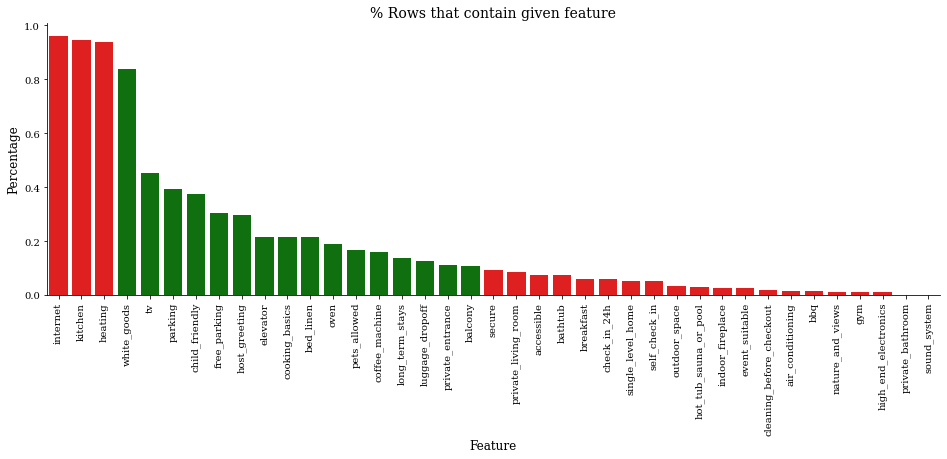

In [24]:
# Remove features with huge imbalance of true/false (i.e 90/10 ratio)
proportion_true = df[list(str_to_replace.values())].mean(axis=0).sort_values(ascending=False)
drop_cols = (proportion_true < 0.1) | (proportion_true > 0.9)
colors = drop_cols.replace({True: 'red', False: 'green'}).to_dict()
plot_bar_perc(proportion_true, palette=colors, title="% Rows that contain given feature", rotate=True, datalabel=False)

In [25]:
# df.drop(proportion_true[drop_cols].index, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

#### property_type

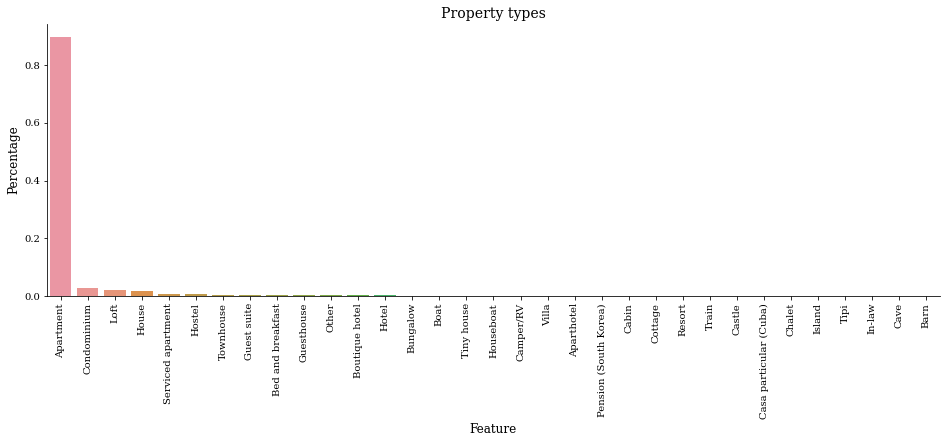

In [26]:
plot_bar_perc(df["property_type"].value_counts(normalize=True), title="Property types", datalabel=False, rotate=True)

In [27]:
# Replacing categories that are types of houses or apartments
df["property_type"].replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House',
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df["property_type"].isin(['House', 'Apartment', "Condominium", "Loft", "Hostel"]), 'property_type'] = 'Other'

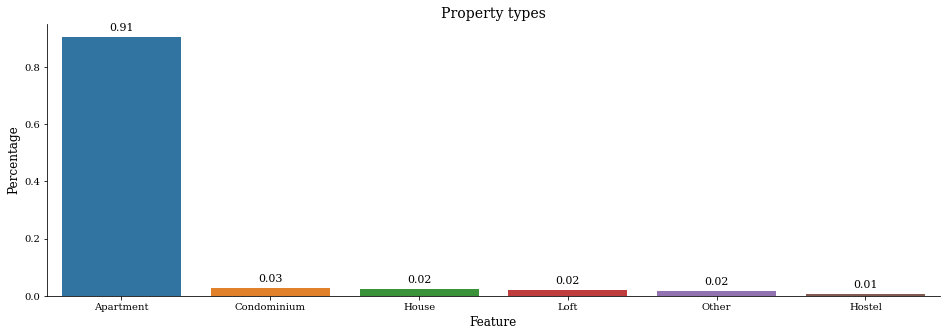

price                          
                size   min     max        mean
property_type                                 
Apartment      20393   1.0  9000.0   59.460109
Condominium      612   8.0   600.0   68.034314
Hostel           127   9.0  5000.0   90.787402
House            543   9.0   999.0   71.545120
Loft             460  10.0  2500.0  119.058696
Other            397   9.0  6000.0  208.743073

In [28]:
plot_bar_perc(df["property_type"].value_counts(normalize=True), title="Property types", datalabel=True)
df.groupby("property_type").agg({"price":['size', 'min', 'max', 'mean']})

### bed_type

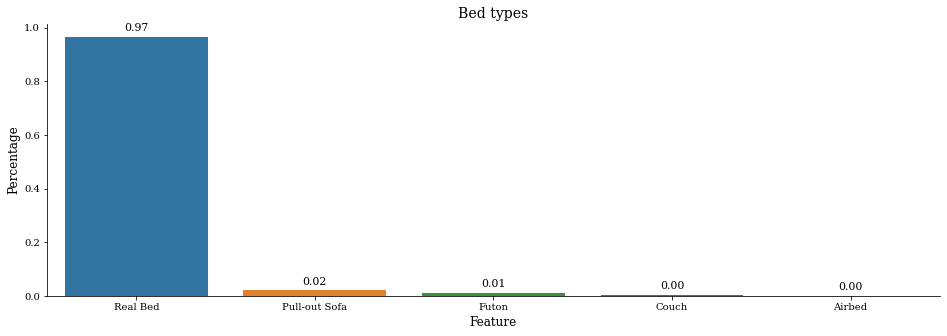

In [29]:
plot_bar_perc(df["bed_type"].value_counts(normalize=True), title="Bed types", datalabel=True)

In [30]:
# Close to 100% of one category... drop the column as it has no discriminative power
df.drop('bed_type', axis=1, inplace=True)

### Cancellation_policy

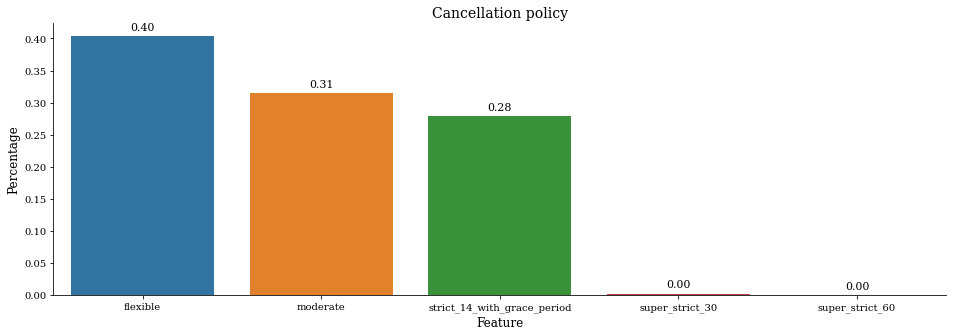

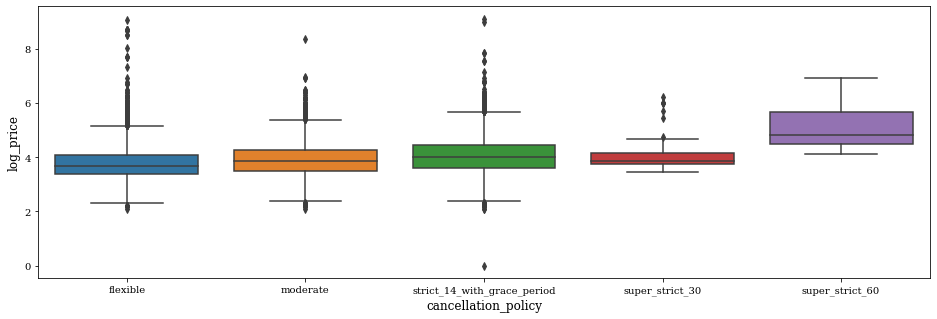

In [31]:
plot_bar_perc(df["cancellation_policy"].value_counts(normalize=True), title="Cancellation policy", datalabel=True)
sns.boxplot(x='cancellation_policy', y='log_price', data=df, order=['flexible', 'moderate', 'strict_14_with_grace_period', 'super_strict_30', 'super_strict_60'])
plt.show()

There seems to be a clear order in the `cancellation_policy` variable in terms of policy versus log_price. we can encode it as ordinal later before modeling.

### Room_type

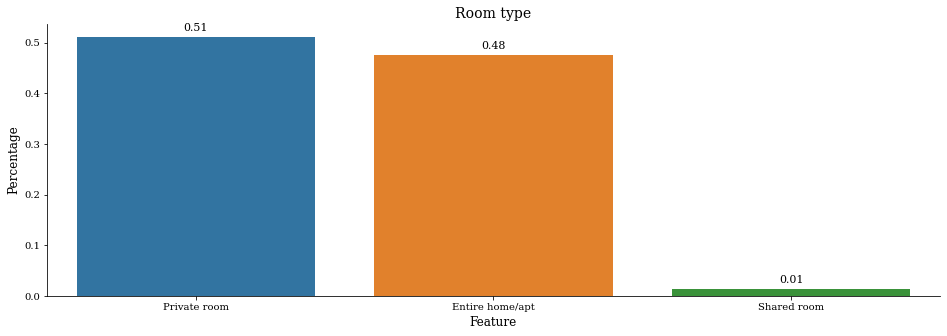

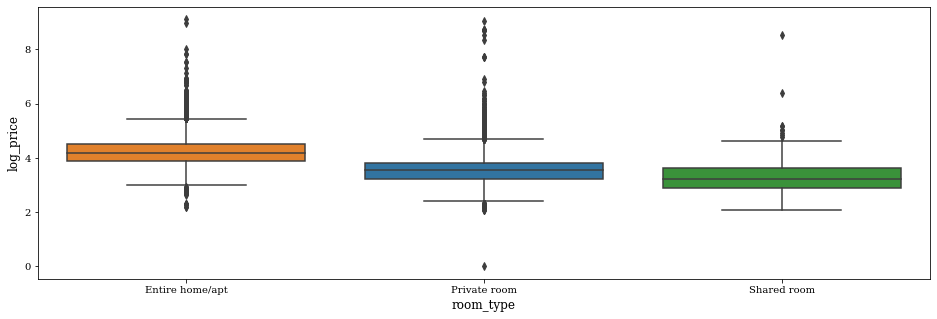

In [32]:
plot_bar_perc(df["room_type"].value_counts(normalize=True), title="Room type", datalabel=True)
palette = {'Private room': 'C0', 'Entire home/apt' :"C1", "Shared room": "C2"} 
sns.boxplot(x='room_type', y='log_price', data=df, palette=palette)
plt.show()

Similar as for the `cancellation_policy` variable, `room_type` seems to have an ordering, which is intuitive if we think of the room types in terms of average personal space. 
we can encode it as ordinal later before modeling.

### Remaining dichotomous columns

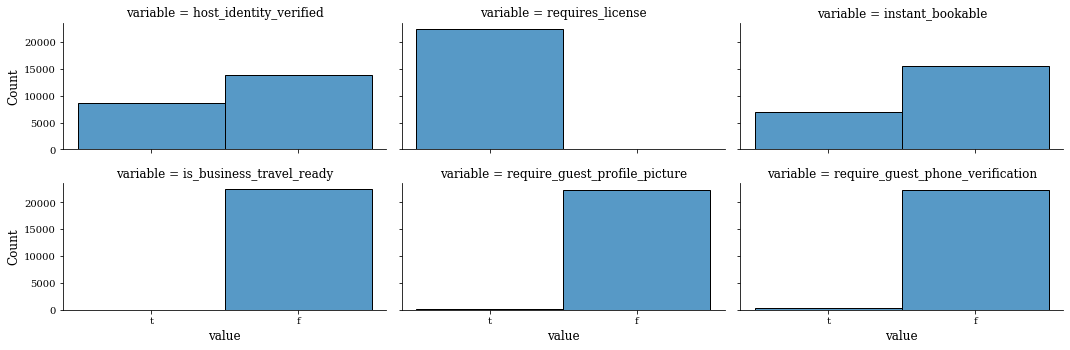

In [33]:
cols = ['host_identity_verified', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']
g = sns.FacetGrid(df.melt(value_vars=cols), col="variable", height=2.5, aspect=2, col_wrap=3)
g.map(sns.histplot, "value")
plt.show()

In [34]:
# Remove column with huge class imbalance
drop_cols = ['requires_license', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']
df.drop(drop_cols, axis=1, inplace=True)

In [35]:
# Encode remaining dichotomous variables to {0, 1}
cols = ["host_identity_verified", "instant_bookable"]
df[cols] = df[cols].replace({"t":1, "f":0})

## Exploration

### Log price vs listing location

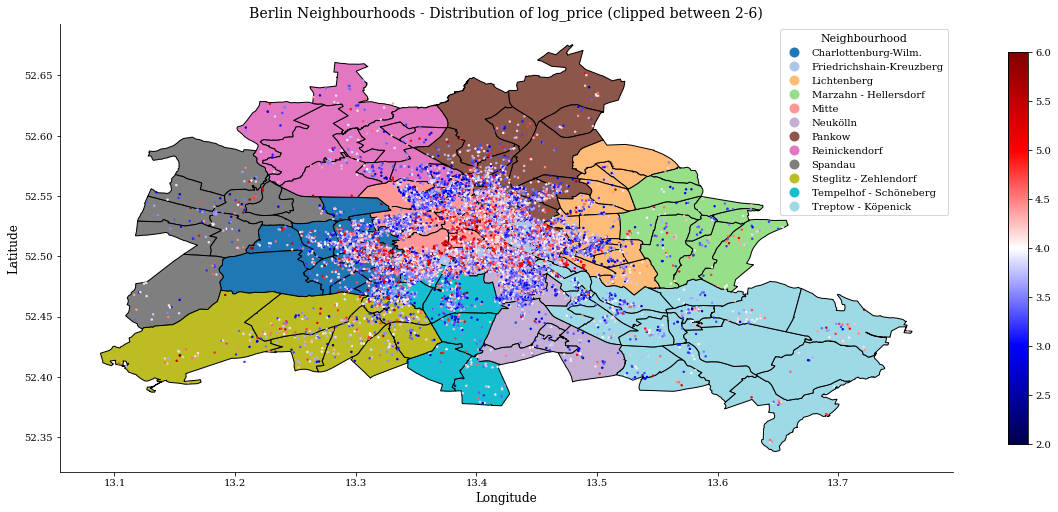

In [36]:
import geopandas as gpd
from shapely.geometry import Point

def plot_listing_locations(df):

    # # Create dataframe with prices and lat/long coordinates
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    geo_prices_df = gpd.GeoDataFrame(df[["log_price"]], geometry = geometry)

    # # Create dataframe with prices and lat/long coordinates
    berlin_neighbourhoods_df = gpd.read_file('data/neighbourhoods.geojson')
    berlin_neighbourhoods_df = berlin_neighbourhoods_df[~ berlin_neighbourhoods_df['neighbourhood_group'].isnull()]

    fig, ax = plt.subplots(1,1,figsize=(20,12))

    berlin_neighbourhoods_df.plot(
        ax=ax, 
        column='neighbourhood_group',
        categorical=True, 
        legend=True, 
        legend_kwds={'title': 'Neighbourhood', 'loc': 'upper right'},
        cmap='tab20', 
        edgecolor='black'
    )

    ax.set(
        title='Berlin Neighbourhoods - Distribution of log_price (clipped between 2-6)', 
        ylabel= 'Latitude',
        xlabel= 'Longitude',
    )

    geo_prices_df['log_price'] = geo_prices_df['log_price'].clip(lower=2, upper=6)

    # Plot listings locations
    geo_prices_df.plot(column = 'log_price', ax=ax, cmap = 'seismic',
                        legend = True, legend_kwds={'shrink': 0.6}, 
                        markersize = 2)
    sns.despine()

plot_listing_locations(df)

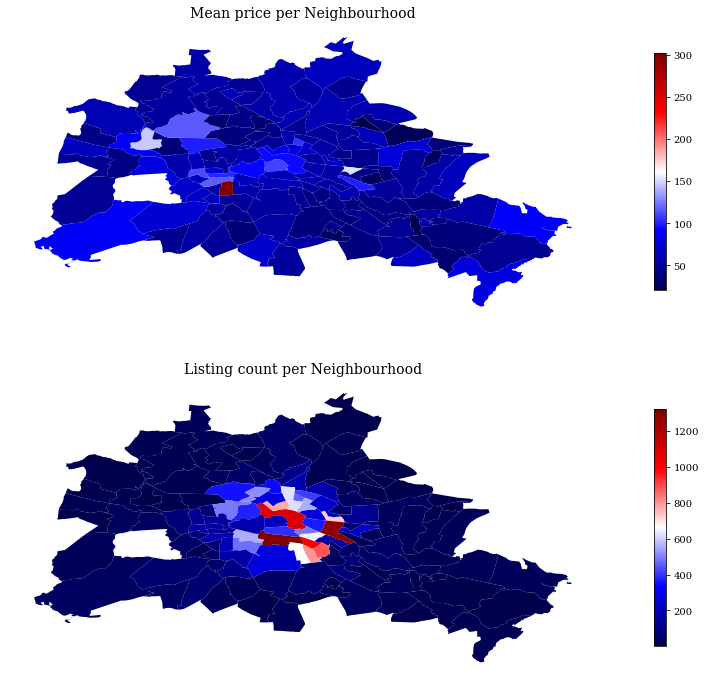

In [37]:
def plot_neighbourhood_heatmaps(df):
    fig, axs = plt.subplots(2,1, figsize=(20,12))

    berlin_neighbourhoods_df = gpd.read_file('data/neighbourhoods.geojson')
    berlin_neighbourhoods_df = berlin_neighbourhoods_df[~ berlin_neighbourhoods_df['neighbourhood_group'].isnull()]

    # Plot heatmap
    temp_df = df.groupby("neighbourhood_cleansed").agg({'price': 'mean', "neighbourhood_cleansed": "count"})
    temp_df.columns = ["Mean price", "Listing count"]
    temp_df = temp_df.reset_index()

    temp_df = pd.merge(temp_df,berlin_neighbourhoods_df[["neighbourhood", "geometry"]], left_on='neighbourhood_cleansed', right_on="neighbourhood" , how='left').drop(columns = ['neighbourhood_cleansed'])
    temp_df = gpd.GeoDataFrame(temp_df, geometry = temp_df["geometry"])

    for col, ax in zip(['Mean price', 'Listing count'],axs):
        ax.set(title=col + " per Neighbourhood")
        temp_df.plot(column=col, cmap='seismic', legend=True, legend_kwds={'shrink': 0.8},  ax=ax)
        ax.axis('off')

plot_neighbourhood_heatmaps(df)

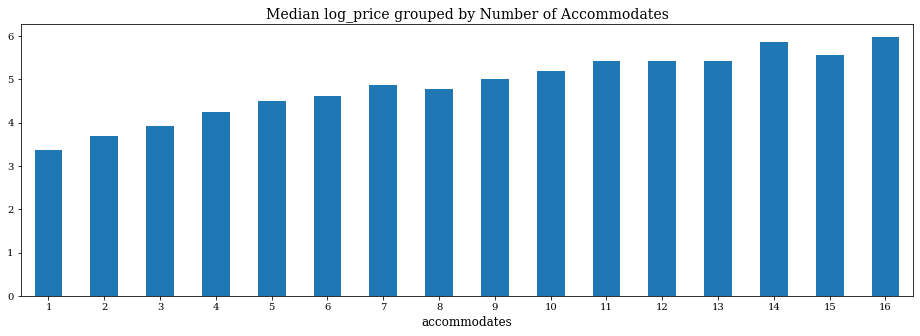

In [38]:
# Let's check the avg price grouped with number of accommodates and calculate pearson value
df.groupby("accommodates")["log_price"].agg(np.median).plot(kind="bar", rot=0)
plt.title("Median log_price grouped by Number of Accommodates")
plt.show()


### Encode categoricals

In [39]:
# Ordinal encode variable
df["cancellation_policy"] = df["cancellation_policy"].map({'flexible':0, 'moderate':1, 'strict_14_with_grace_period':2, 'super_strict_30':3, 'super_strict_60':4})
df["room_type"] = df["room_type"].map({"Shared room": 0, 'Private room': 1, 'Entire home/apt' : 2} )


# One Hot Encoding for categorical variables
df = pd.get_dummies(df)

In [40]:
df["bedrooms"].astype(float)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
22547    1.0
22548    1.0
22549    0.0
22550    1.0
22551    1.0
Name: bedrooms, Length: 22532, dtype: float64

### Train/Test Split

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(["price", "log_price"], axis=1)
y = df["log_price"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Feature shapes\nTrain:\t{X_train.shape}\nTest:\t{X_test.shape}")
print(f"Target shapes\nTrain:\t{y_train.shape}\nTest:\t{y_test.shape}")

n_features = len(X_train.columns)

Feature shapes
Train:	(18025, 206)
Test:	(4507, 206)
Target shapes
Train:	(18025,)
Test:	(4507,)


## Modeling

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

#### Hyperparameter tuning

In [42]:
# Find optimal parameters (in acceptable timeframe) with RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV

# Instantiate RF regression model
rf = RandomForestRegressor(n_jobs=-1)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2100, num = 20)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 15]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, n_jobs = -1)

# Finds the best hyperparameter settings
random_search.fit(X_train, y_train)

print(random_search.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'n_estimators': 1784, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


#### Evaluation

In [43]:
# Instantiate RF regression model with optimal hyperparameter settings
opt_params = {'n_estimators': 1784, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
rf = RandomForestRegressor(n_jobs=-1, **opt_params)

# Fit the model and make predictions
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

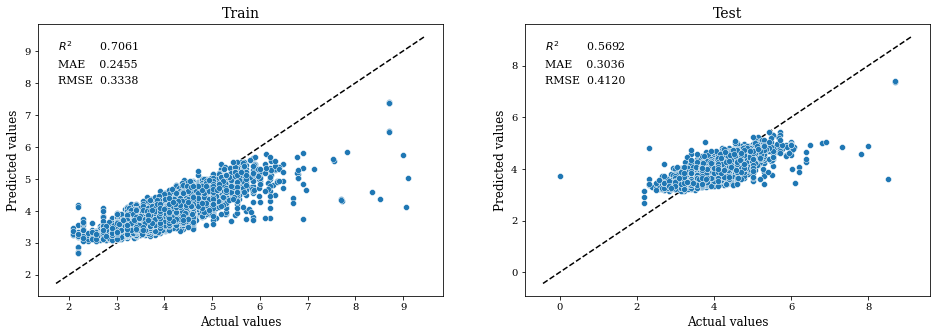

In [44]:
def actual_vs_predict(y, y_pred, ax, title=None):
    # Transform back to normal prices
    # y = np.exp(y)
    # y_pred = np.exp(y_pred)

    sns.scatterplot(x=y , y=y_pred, ax=ax, zorder=2)
    ax.set(xlabel = 'Actual values', ylabel='Predicted values', title=title)

    # Diagonal 
    vals = np.array(ax.get_xlim())
    ax.plot(vals, vals, color='k', linestyle='--', zorder=1)

    # Evaluation metrics
    ax.text(0.05, 0.9, r"$R^2$" + f"{r2_score(y, y_pred):14.04f}", transform=ax.transAxes)
    ax.text(0.05, 0.84, f"MAE {mean_absolute_error(y, y_pred):9.04f}", transform=ax.transAxes)
    ax.text(0.05, 0.78, f"RMSE {sqrt(mean_squared_error(y, y_pred)):7.04f}", transform=ax.transAxes)

# Plot predicted vs actual with eval metrics 
fig, axs = plt.subplots(1,2)

actual_vs_predict(y_train, y_pred_train, axs[0], title='Train')
actual_vs_predict(y_test, y_pred_test, axs[1], title="Test")
plt.show()

In [45]:
pd.DataFrame(np.exp((y_test.values,y_pred_test)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289,4290,4291,4292,4293,4294,4295,4296,4297,4298,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325,4326,4327,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338,4339,4340,4341,4342,4343,4344,4345,4346,4347,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377,4378,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412,4413,4414,4415,4416,4417,4418,4419,4420,4421,4422,4423,4424,4425,4426,4427,4428,4429,4430,4431,4432,4433,4434,4435,4436,4437,4438,4439,4440,4441,4442,4443,4444,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458,4459,4460,4461,4462,4463,4464,4465,4466,4467,4468,4469,4470,4471,4472,4473,4474,4475,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506
0,65.000000,75.000000,35.000000,75.000000,68.000000,55.000000,60.000000,25.000000,80.000000,25.000000,35.000000,23.000000,45.000000,39.000000,69.000000,100.000000,40.000000,63.000000,65.000000,35.000000,46.000000,35.000000,32.000000,40.00000,40.000000,92.000000,45.000000,65.000000,59.000000,45.000000,55.000000,31.000000,20.000000,30.000000,45.000000,35.00000,60.000000,90.00000,38.000000,110.000000,15.000000,50.000000,30.000000,60.000000,99.000000,25.000000,50.000000,75.000000,28.000000,35.000000,20.000000,150.000000,45.00000,40.000000,51.000000,25.000000,120.00000,20.000000,35.000000,34.000000,99.000000,38.000000,70.000000,120.000000,92.00000,45.000000,90.000000,64.000000,85.000000,78.00000,25.00000,38.000000,39.000000,30.000000,89.000000,18.000000,150.00000,45.00000,35.000000,55.000000,30.00000,29.000000,65.000000,25.000000,75.00000,43.000000,29.000000,25.000000,59.000000,65.00000,61.000000,75.000000,65.000000,35.000000,49.000000,60.000000,85.000000,35.000000,101.000000,105.000000,30.000000,18.00000,75.000000,50.000000,50.000000,15.000000,50.000000,14.000000,68.000000,30.000000,69.00000,79.000000,99.000000,120.000000,45.000000,50.000000,45.000000,32.000000,100.000000,33.000000,80.000000,33.000000,51.00000,60.000000,40.000000,27.000000,290.000000,137.000000,40.000000,30.000000,24.000000,132.000000,25.000000,150.000000,140.00000,109.000000,24.000000,89.000000,65.000000,26.000000,30.000000,200.000000,49.000000,90.00000,42.000000,70.000000,140.000000,50.000000,35.000000,62.000000,65.000000,175.000000,30.000000,888.000000,90.000000,50.000000,40.000000,60.000000,39.000000,50.000000,77.000000,55.000000,40.000000,26.00000,39.00000,70.000000,60.000000,42.000000,30.000000,418.000000,35.000000,160.000000,150.00000,30.000000,25.000000,27.000000,40.000000,31.000000,160.000000,53.000000,24.000000,29.000000,49.000000,55.000000,35.000000,

### Feature importance

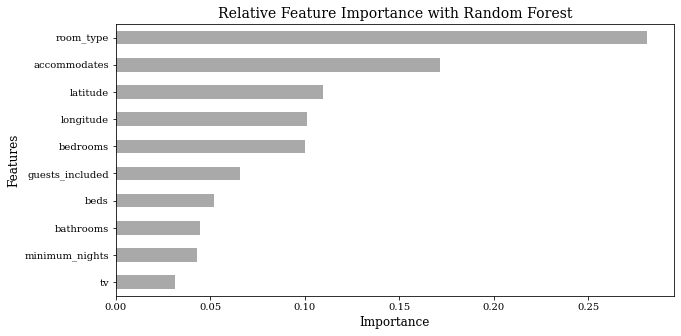

In [68]:
def plot_importance(feat_importances):
    # plot the important features
    feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
    
    plt.title('Relative Feature Importance with Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Features')


feat_importances = pd.Series(rf.feature_importances_, X.columns)
plot_importance(feat_importances)


In [56]:
list(feat_importances.nlargest(15).index)

['room_type',
 'accommodates',
 'bedrooms',
 'latitude',
 'guests_included',
 'longitude',
 'beds',
 'bathrooms',
 'minimum_nights',
 'tv',
 'maximum_nights',
 'cancellation_policy',
 'child_friendly',
 'elevator',
 'property_type_Other']

In [64]:
important_feats = list(feat_importances.nlargest(10).index)

In [65]:
X = df[important_feats]
y = df["log_price"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Feature shapes\nTrain:\t{X_train.shape}\nTest:\t{X_test.shape}")
print(f"Target shapes\nTrain:\t{y_train.shape}\nTest:\t{y_test.shape}")

n_features = len(X_train.columns)

Feature shapes
Train:	(18025, 10)
Test:	(4507, 10)
Target shapes
Train:	(18025,)
Test:	(4507,)


In [66]:
rf = RandomForestRegressor(n_jobs=-1, **opt_params)

# Fit the model and make predictions
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

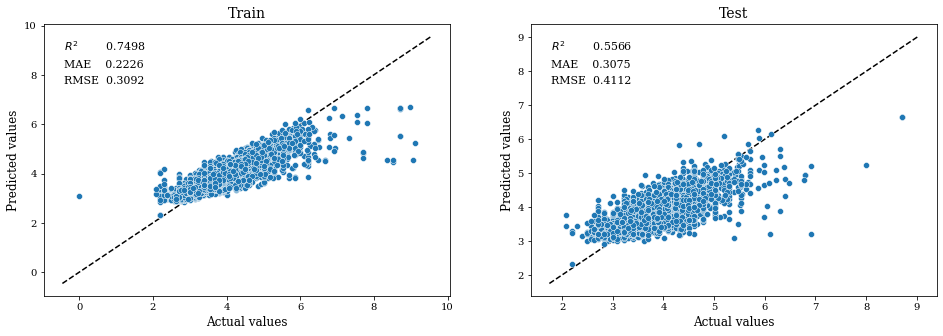

In [67]:
# Plot predicted vs actual with eval metrics 
fig, axs = plt.subplots(1,2)
actual_vs_predict(y_train, y_pred_train, axs[0], title='Train')
actual_vs_predict(y_test, y_pred_test, axs[1], title="Test")
plt.show()

#### Visualize decision tree

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X_train.columns,
          filled=True, precision=3,
          rounded=True)
plt.show()

KeyboardInterrupt: 

### random

In [170]:
import xgboost as xgb

# Fitting the model
xgb_reg = xgb.XGBRegressor()

random_grid = {
            'gamma': [0.5, 1, 1.5, 2, 5],
            "subsample":[0.5, 0.75, 1],
            "colsample_bytree":[0.5, 0.75, 1],
            "max_depth":[2, 6, 12, 24],
            "min_child_weight":[1,5,15],
            "learning_rate":[0.3, 0.1, 0.03],
            "n_estimators":[100,200,300,400,500,600,700,800,900,1000]}

random_search = RandomizedSearchCV(estimator = xgb_reg, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [172]:
opt_params = random_search.best_params_

# Fitting the model
xgb_reg = xgb.XGBRegressor(n_jobs=-1, **opt_params)

In [173]:
# Fit the model and make predictions
xgb_reg.fit(X_train, y_train)

y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)

C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


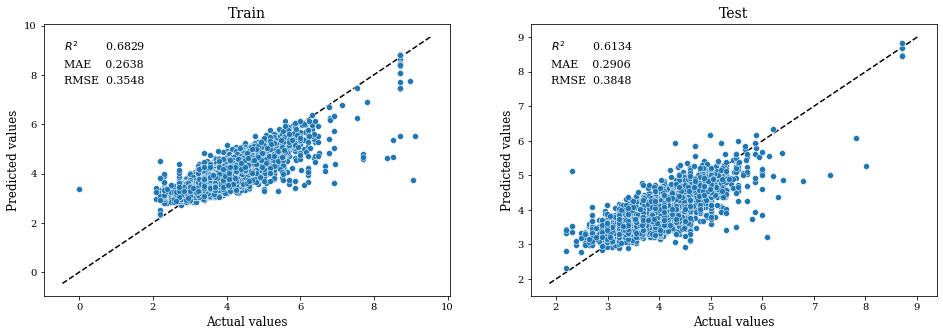

In [174]:
# Plot predicted vs actual with eval metrics 
fig, axs = plt.subplots(1,2)
actual_vs_predict(y_train, y_pred_train, axs[0], title='Train')
actual_vs_predict(y_test, y_pred_test, axs[1], title="Test")
plt.show()

## Random

In [31]:
# import plotly.express as px

# # Visualize the results of random search
# fig = px.scatter_3d(rs_df, x="param_max_depth", y="param_min_samples_split", z="param_n_estimators",
#                 color="mean_test_score", opacity=0.7)
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


def explore_categorical(df, col):
    fig, axs = plt.subplots(2,1, sharex=True, gridspec_kw={"height_ratios": [3, 1]})

    sns.boxplot(x=col, y="log_price", data=df, ax=axs[0])
    axs[0].set(xlabel="")
    sns.countplot(x=col, data=df, ax=axs[1])
    plt.show()
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


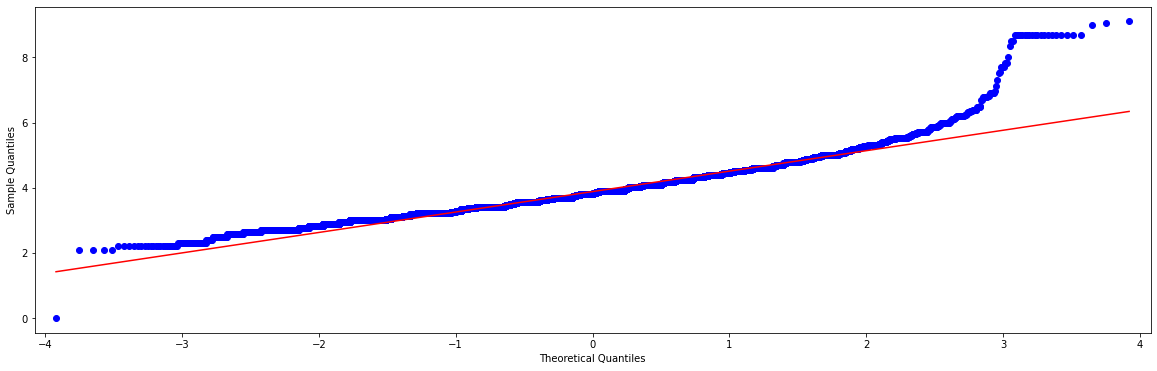

In [32]:
# xgboost
# randomforest regressor
# linear regression


# QQ Plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(df["log_price"], line="s")
plt.show()


# Filter by correlation


corr_matrix = abs(df.corr(method="pearson"))

# Getting the Upper Triangle of the co-relation matrix
mask = np.triu(corr_matrix, k=1)

sns.heatmap(corr_matrix, vmin=0, vmax=1., annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5, mask=mask)
plt.title("Pearson correlation")
plt.show()




explore_categorical(df, col)

from sklearn.compose import TransformedTargetRegressor

rf = TransformedTargetRegressor(regressor=RandomForestRegressor(n_jobs=-1), func = np.log, inverse_func=np.exp)
rf.fit(X_train, y_train)

In [ ]:
# Define categorical columns
# categorical = list(X_train.select_dtypes("object").columns)
# print(f"Categorical columns are: {categorical}")

# # Define numerical columns
# numerical = list(X_train.select_dtypes("number").columns)
# print(f"Numerical columns are: {numerical}")


# Plot the above dataframe for better understanding
# We would like to measure the popularity of average prices for each berlin neighbourhood just for our analysis
def plot_price_vs_neighbourhood(df):
    # df_neighbourhood_group = pd.DataFrame(df["neighbourhood_group_cleansed"].value_counts())

    # # # Taking the avg price of the neighbourhood cleansed column
    # neighbourhood_avgprice = df.groupby('neighbourhood_group_cleansed')['log_price'].agg(np.median)

    temp_df = df.groupby("neighbourhood_group_cleansed").agg({'price': 'mean', "neighbourhood_group_cleansed": "count"})
    temp_df.columns = ["Mean price", "Listing count"]
    temp_df = temp_df.reset_index().sort_values(by="Listing count", ascending=False)

    # temp_plot = temp_df.plot(kind = 'bar', y = 'neighbourhood_cleansed', x='Listing count'))
    ax = sns.barplot(y="neighbourhood_group_cleansed", x="Listing count", data=temp_df, color='grey', edgecolor='k')
    ax2 = ax.twiny()

    ax = sns.scatterplot(y="neighbourhood_group_cleansed", x="Mean price", data=temp_df, color='crimson', ax=ax2)


plot_price_vs_neighbourhood(df)

# neighbourhood_plot = df.plot(kind = 'bar', x = 'neighbourhood', y='properties_count', figsize=(19,7))
# neighbourhood_info.plot(x = 'neighbourhood', y='avg_price', ax= neighbourhood_plot, secondary_y= True, color='r')

df.drop(df[(df["price"]>df["price"].quantile(0.995))].index, axis=0, inplace=True)
# # identify outliers
# outliers = [x for x in df["price"].index.values if x < lower or x < upper]

# # df.iloc[outliers]
# len(outliers)

Future ideas
1. Use clustering to group levels of `property_type` based on their average price instead of grouping them all as "other"
2. Attempt to include the (transformed) `zipcode` feature for more fine granularity
3. Include `neighbourhood_cleansed` (and maybe exclude `neighbourhood_group_cleansed`)
4. Add more models and use an aggeregated prediction
5. Apply NLP on the dropped Text columns (e.g extract keywords)
    - for example, i noticed alot of square feet in description whilst the square_feet col was NaN, we can try to extract these values.
6. More in-depth analysis of the `amenities` feature
    - in terms of grouping features, dropping certain features

7. for client, get a `suitable_for_events` feature option in the amenities column, this can catch some of the more expensive listings

Sources
1. [why transforming target variable also helps for regression trees](https://stats.stackexchange.com/questions/447863/log-transforming-target-var-for-training-a-random-forest-regressor)



https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

https://medium.com/@ravivemuri46/price-reflections-in-airbnb-berlin-9f27f7dc8011
